In [1]:
# Import Libraries
from huggingface_hub import login
import os
from transformers import pipeline
from datasets import load_dataset
import torch
from diffusers import DiffusionPipeline
import soundfile as sf
from IPython.display import Audio

hf_token = os.getenv('HF_TOKEN')
login(token=hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [2]:
# Sentiment Analysis
classifier = pipeline(task="sentiment-analysis", device="cuda")
sa_result = classifier("I'm very excited to embark this journey to LLM Mastery !!")
print(f"\n\nSentinent Analysis : {sa_result}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda




Sentinent Analysis : [{'label': 'POSITIVE', 'score': 0.9996583461761475}]


In [3]:
# Named Entity Recognition
ner = pipeline(task="ner", grouped_entities=True, device="cuda")
ner_result = ner("Narendra Modi is the current prime minister of India.")
print(f"\n\nNamed Entity Recognition : {ner_result}")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda




Named Entity Recognition : [{'entity_group': 'PER', 'score': np.float32(0.99803513), 'word': 'Narendra Modi', 'start': 0, 'end': 13}, {'entity_group': 'LOC', 'score': np.float32(0.9980913), 'word': 'India', 'start': 47, 'end': 52}]


c:\Users\91992\anaconda3\envs\hf_cuda_llmenv\Lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [4]:
# Question Answering with Context
qa = pipeline(task="question-answering", device="cuda")
qa_result = qa(question="Who is the prime minister of India ?", 
               context="Barack Obama was the 44th president of USA. Manmohan Singh was the prime minister of India till 2014. Narendra Modi is the current prime minister of India.")
print(f"\n\nQuestion Answering With Context : {qa_result}")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda




Question Answering With Context : {'score': 0.7700850963592529, 'start': 102, 'end': 115, 'answer': 'Narendra Modi'}


In [5]:
# Text Summarization
summarizer = pipeline(task="summarization", device="cuda")
text = f"""The huggingface_hub library allows you to interact with the Hugging Face Hub, a machine learning platform for creators and collaborators. Discover pre-trained models and datasets for your projects or play with the hundreds of machine learning apps hosted on the Hub. You can also create and share your own models and datasets with the community. The huggingface_hub library provides a simple way to do all these things with Python."""
summary_result = summarizer(text, max_length=50, min_length=25, do_sample=False)
print(f"\n\nSummary Text : {summary_result[0]["summary_text"]}")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda




Summary Text :  Hugging Face Hub is a machine learning platform for creators and collaborators . Discover pre-trained models and datasets for your projects or play with the hundreds of machine learning apps hosted on the Hub .


In [6]:
# Translation
translator = pipeline(task="translation_en_to_fr", device="cuda")
translation_result = translator("Chess is a two-player strategy board game where the goal is to checkmate your opponent's king.")
print(f"\n\nTranslated Text (En to Fr): {translation_result[0]["translation_text"]}")

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda




Translated Text (En to Fr): L'échec est un jeu de cartes de stratégie à deux joueurs où l'objectif est de contrôler le roi de votre adversaire.


In [7]:
# Translation using a specified model
translator = pipeline(task="translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es", device="cuda")
translation_result = translator("Chess is a two-player strategy board game where the goal is to checkmate your opponent's king.")
print(f"\n\nTranslated Text (En to Es) using Helsinki-NLP/opus-mt-en-es Model : {translation_result[0]["translation_text"]}")

c:\Users\91992\anaconda3\envs\hf_cuda_llmenv\Lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda




Translated Text (En to Es) using Helsinki-NLP/opus-mt-en-es Model : El ajedrez es un juego de mesa de estrategia de dos jugadores donde el objetivo es el jaquemate del rey de tu oponente.


In [8]:
# Classification
zs_classifier = pipeline(task="zero-shot-classification", device="cuda")
zs_result = zs_classifier("Red Dead Redemption is a 2010 action-adventure game developed by Rockstar San Diego and published by Rockstar Games.", candidate_labels=["Video Games", "Politics", "Science"])
print(f"\n\nZero Shot Classification : {zs_result}")

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda




Zero Shot Classification : {'sequence': 'Red Dead Redemption is a 2010 action-adventure game developed by Rockstar San Diego and published by Rockstar Games.', 'labels': ['Video Games', 'Science', 'Politics'], 'scores': [0.9924451112747192, 0.004192149732261896, 0.003362759482115507]}


In [9]:
# Text Generation
generator = pipeline(task="text-generation", device="cuda")
generator_result = generator("If there's one thing I am scared of AIs, it's")
print(f"\n\nText Generation : {generator_result[0]["generated_text"]}")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.




Text Generation : If there's one thing I am scared of AIs, it's when they can't really communicate, they tend to ignore those messages."

The research team included a national expert from Oxford's School of Public Health who has a track record of


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

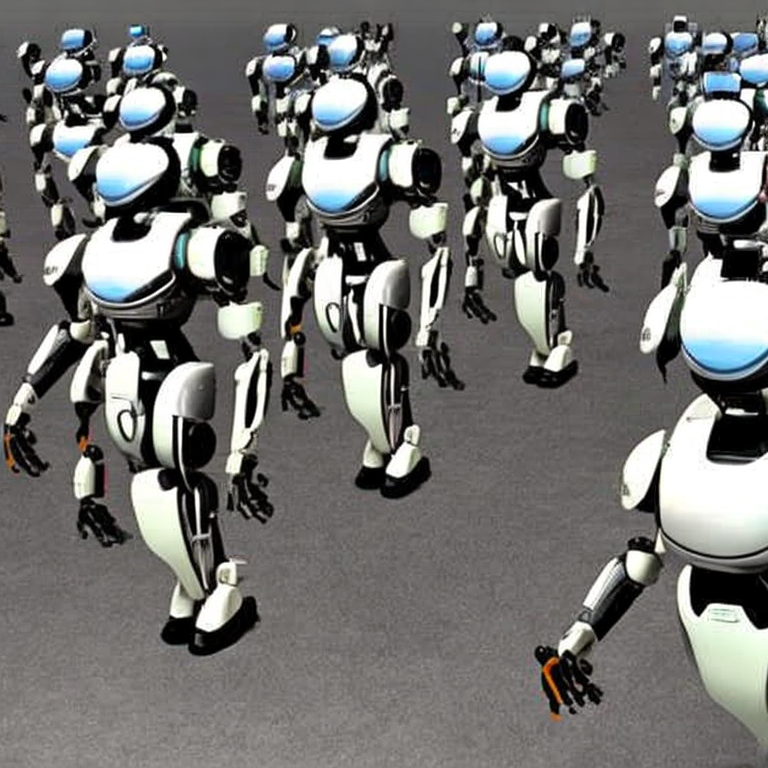

In [10]:
# Image Generation
image_gen = DiffusionPipeline.from_pretrained(
    pretrained_model_name_or_path="stabilityai/stable-diffusion-2", torch_dtype=torch.float16,
    use_safetensors=True, variant="fp16").to("cuda")
text = "A class of Robots eventually overpowering humans, in the year 2050."
generated_image = image_gen(prompt=text).images[0]
generated_image

In [11]:
# Audio Generation
synthesiser = pipeline(task="text-to-speech", model="microsoft/speecht5_tts", device="cuda")
embeddings_dataset = load_dataset(path="Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(data=embeddings_dataset[7306]["xvector"]).unsqueeze(0)
speech = synthesiser("Hi, I am Ashish Verma, and I like to play chess. My chess elo is 1450.", forward_params={"speaker_embeddings": speaker_embedding})
sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda
